In [1]:
"""
Date: 14th August,2018.
Time: 16.26
Version: 1.2
Author: Vageesh Saxena
Dataset: AAPL WIKI EOD Stock Prices
         KO WIKI EOD Stock Prices
Description: 

Part 1. Setup

Choose any two stocks for which there is available historical price data (two years, e.g. in Yahoo Finance or
Quandl) - e.g. BMW and AAPL

1. Plot the stock prices of the two, compute a trend line, and plot the trend line with the stock price. How
correlated are the assets?
2. Show the formula of the trendline and briefly discuss the pros and cons of the trendline method you chose.
Plot the trendline against the stock price.
3. Compute a prediction of the stock prices one week from now and plot it on the same graph as the trendline
and stock price. Add an uncertainty measure, e.g. the variance of price changes/
4. Construct a portfolio from the two stocks. How do you choose the amount of each stock in the portfolio?
How do you reduce the risk?
5. Construct the same plot for the portfolio as you did for each of the stocks, including a prediction of the
portfolio price in one week and the same measure of risk.

Part 2. Iliquid Asset

Consider an asset that cannot be traded regularly. (A house, for example, cannot be traded on an exchange).

Assume that the asset unit costs now 13 times the price of one of the stocks of your portfolio (pick one)

Also assume that the price is correlated with correlation factor -0,7 to the same stock price.

1. Add that asset to the portfolio you constructed above
2. Make a one week prediction of the price evolution, including a measure of the risk. How would you go
about it?
3. Suppose that in two days you are told that somebody else has bought the same asset at a 20% higher price,
the price of stock 1 is 3% lower and the price of stock 2 is the same. How would you change your portfolio?

"""

'\nDate: 31th JULY, 2018.\nTime: 11:43\nVersion: 1.1\nAuthor: Vageesh Saxena\nDataset: AAPL WIKI EOD Stock Prices\n         KO WIKI EOD Stock Prices\nDescription: \n\nPart 1. Setup\n\nChoose any two stocks for which there is available historical price data (two years, e.g. in Yahoo Finance or\nQuandl) - e.g. BMW and AAPL\n\n1. Plot the stock prices of the two, compute a trend line, and plot the trend line with the stock price. How\ncorrelated are the assets?\n2. Show the formula of the trendline and briefly discuss the pros and cons of the trendline method you chose.\nPlot the trendline against the stock price.\n3. Compute a prediction of the stock prices one week from now and plot it on the same graph as the trendline\nand stock price. Add an uncertainty measure, e.g. the variance of price changes/\n4. Construct a portfolio from the two stocks. How do you choose the amount of each stock in the portfolio?\nHow do you reduce the risk?\n5. Construct the same plot for the portfolio as you

In [2]:
# Installation of the necessary python packages
"""
! pip install quandl
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install pydot
! pip install sklearn
! pip install mpl_finance
"""

'\n! pip install quandl\n! pip install pandas\n! pip install numpy\n! pip install matplotlib\n! pip install seaborn\n! pip install pydot\n! pip install sklearn\n! pip install mpl_finance\n'

In [3]:
# Importing packages
import datetime
import math
import time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn import preprocessing,cross_validation

import quandl as qd
import numpy as np
import pandas as pd

from scipy.stats import pearsonr

import seaborn as sns

import pydot

from mpl_finance import candlestick_ohlc

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
from matplotlib import cm as cm
# For using ggplots
style.use('ggplot')
# For the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)


import warnings
from IPython.display import display
warnings.filterwarnings('ignore')

/home/vageesh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


# Fetching data from Quandl

In [4]:
"""# Using the API to fetch data from quandl
qd.ApiConfig.api_key = "Insert your key"
# Collecting AAPL and KO WIKI data for the last two years
AAPL_data = qd.get("WIKI/AAPL",start_date="2016-08-31",end_date="2018-08-31")
KO_data = qd.get("WIKI/KO",start_date="2016-08-31",end_date="2018-08-31")"""

'# Using the API to fetch data from quandl\nqd.ApiConfig.api_key = "QHxsUddFt1AxxpV8qjms"\n# Collecting AAPL and KO WIKI data for the last two years\nAAPL_data = qd.get("WIKI/AAPL",start_date="2016-08-31",end_date="2018-08-31")\nKO_data = qd.get("WIKI/KO",start_date="2016-08-31",end_date="2018-08-31")'

In [5]:
"""# Saving data to csv files
AAPL_data.to_csv("AAPL.csv",encoding='utf-8')
KO_data.to_csv("KO.csv",encoding='utf-8')"""

'# Saving data to csv files\nAAPL_data.to_csv("AAPL.csv",encoding=\'utf-8\')\nKO_data.to_csv("KO.csv",encoding=\'utf-8\')'

# Importing and Visulaizing data from local directory

Open is the price of the stock at the beginning of the trading day (it need not be the closing price of the previous trading day), high is the highest price of the stock on that trading day, low the lowest price of the stock on that trading day, and close the price of the stock at closing time. Volume indicates how many stocks were traded. Adjusted prices (such as the adjusted close) is the price of the stock that adjusts the price for corporate actions. While stock prices are considered to be set mostly by traders, stock splits (when the company makes each extant stock worth two and halves the price) and dividends (payout of company profits per share) also affect the price of a stock and should be accounted for.

In [6]:
AAPL_data = pd.read_csv("AAPL.csv",parse_dates=True)
KO_data = pd.read_csv("KO.csv",parse_dates=True)

In [7]:
# Displaying the AAPL data
AAPL_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2016-08-31,105.66,106.5699,105.64,106.10,29662406.0,0.0,1.0,103.816156,104.710177,103.796505,104.248477,29662406.0
1,2016-09-01,106.14,106.8000,105.62,106.73,26701523.0,0.0,1.0,104.287779,104.936262,103.776854,104.867483,26701523.0
2,2016-09-02,107.70,108.0000,106.82,107.73,26802450.0,0.0,1.0,105.820556,106.115321,104.955913,105.850032,26802450.0
3,2016-09-06,107.90,108.3000,107.51,107.70,26880391.0,0.0,1.0,106.017066,106.410086,105.633872,105.820556,26880391.0
4,2016-09-07,107.83,108.7600,107.07,108.36,42364328.0,0.0,1.0,105.948287,106.862058,105.201550,106.469039,42364328.0


In [8]:
print("Shape of AAPL data: ",AAPL_data.shape)

Shape of AAPL data:  (393, 13)


In [9]:
# Displaying the BMW  data
KO_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2016-08-31,43.43,43.46,43.080,43.43,10217936.0,0.0,1.0,41.658137,41.686914,41.322417,41.658137,10217936.0
1,2016-09-01,43.21,43.41,43.200,43.35,8457766.0,0.0,1.0,41.447113,41.638953,41.437521,41.581401,8457766.0
2,2016-09-02,43.52,43.83,43.470,43.66,9025960.0,0.0,1.0,41.744466,42.041818,41.696506,41.878754,9025960.0
3,2016-09-06,43.74,43.80,43.395,43.79,8600272.0,0.0,1.0,41.955490,42.013042,41.624565,42.003450,8600272.0
4,2016-09-07,43.72,43.80,43.530,43.64,8656580.0,0.0,1.0,41.936306,42.013042,41.754058,41.859570,8656580.0


In [10]:
print("Shape of KO data: ",KO_data.shape)

Shape of KO data:  (394, 13)


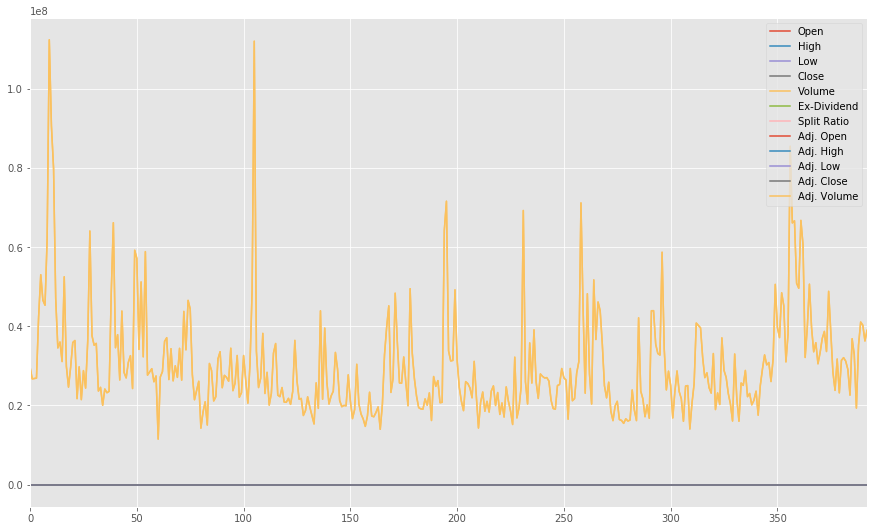

In [11]:
# Visualizing AAPL_data
AAPL_data.plot(grid = True)
plt.show()

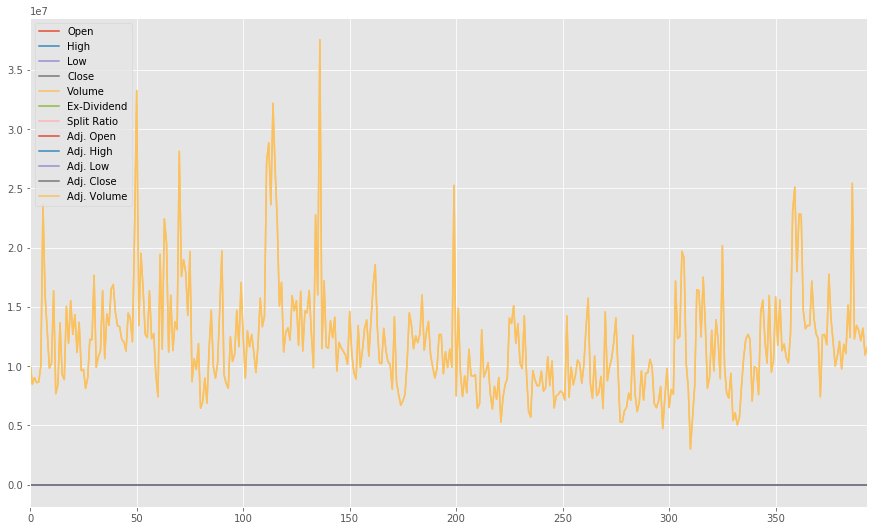

In [12]:
# Visualizing KO_data
KO_data.plot(grid = True)
plt.show()

# Plotting the trend line and getting the correlation between the assets.

Trendlines, also known as bounding lines, are lines drawn on a stock chart that connect two or more price points. Since stock prices tend to trend, trendlines that connect the highs or lows in the stock's price history can help identify the current trend and predict what the stock price might do in the future.

As with any other data presentation, sometimes you really can’t see what direction the data is headed in without help.Because the data appears within a DataFrame, you must export it using as_matrix() and then flatten the resulting array using flatten() before you can use it as input to polyfit(). Likewise, you must export the data before you can call plot() to display the trendline onscreen.

When you plot the initial data, the call to plot() automatically generates a legend for you. MatPlotLib doesn’t automatically add the trendline, so you must also create a new legend for the plot. 

In [13]:
def plot_stock_price(x,y,x_label,y_label,colors):
    """
    x : numpy array or data-series(dtype : ndarray or pandas.core.series.Series - dates series)
    y : numpy array or data-series(dtype : ndarray or pandas.core.series.Series)
    x_label : label for the x-axis(dtype : string)
    y_label : label for the y-axis(dtype : string)
    colors : color for the scatter plot(dtype : string)
    """
    dates = [pd.to_datetime(d) for d in x]
    plt.scatter(dates, y, s =20, c = colors,linewidths=None)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title("Stock prices with respect the dates")
    plt.show()

In [14]:
def plot_trendline_on_scatter_plot(x,y,x_label,y_label,colors):
    """
    x : numpy array or data-series(dtype : ndarray or pandas.core.series.Series - dates series)
    y : numpy array or data-series(dtype : ndarray or pandas.core.series.Series)
    x_label : label for the x-axis(dtype : string)
    y_label : label for the y-axis(dtype : string)
    colors : color for the scatter plot(dtype : string)
    """
    # plot the data itself
    dates = [pd.to_datetime(d) for d in x]
    plt.scatter(dates, y, s =10, c = colors,linewidths=None)
    # Calculate the slope and y-intercept of the trendline for linear fitting
    # Polyfit minimizes the squared error and can find a line or any higher-degree polynomial fit, as specified by 
    #                                                                                         the third argument.
    x = mdates.date2num(dates)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title("Trend line for AAPL and KO stock data")
    plt.show()
    # the line equation:
    print("y=%.6fx+(%.6f)"%(z[0],z[1]))

In [15]:
def plot_trendline_on_scatter_plot_with_predictions(x,y,x_label,y_label,colors,predictions_data,true_data):
    """
    x : numpy array or data-series(dtype : ndarray or pandas.core.series.Series - dates series)
    y : numpy array or data-series(dtype : ndarray or pandas.core.series.Series)
    x_label : label for the x-axis(dtype : string)
    y_label : label for the y-axis(dtype : string)
    colors : color for the scatter plot(dtype : string)
    prediction_data : from Random forest generator(dtype: ndarray)
    """
    # plot the data itself
    dates = [pd.to_datetime(d) for d in x]
    plt.scatter(dates, y, s =10, c = colors,linewidths=None)
    # Calculate the slope and y-intercept of the trendline for linear fitting
    # Polyfit minimizes the squared error and can find a line or any higher-degree polynomial fit, as specified by 
    #                                                                                         the third argument.
    x = mdates.date2num(dates)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    # Plot the actual values
    plt.plot(true_data['date'], true_data['Adj. Close'], 'b-', label = 'Adj. Close')
    # Plot the predicted values
    plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
    plt.xticks(rotation = '60') 
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.title("Actual and Predicted Values for AAPL Data")
    plt.show()
    # the line equation:
    print("y=%.6fx+(%.6f)"%(z[0],z[1]))

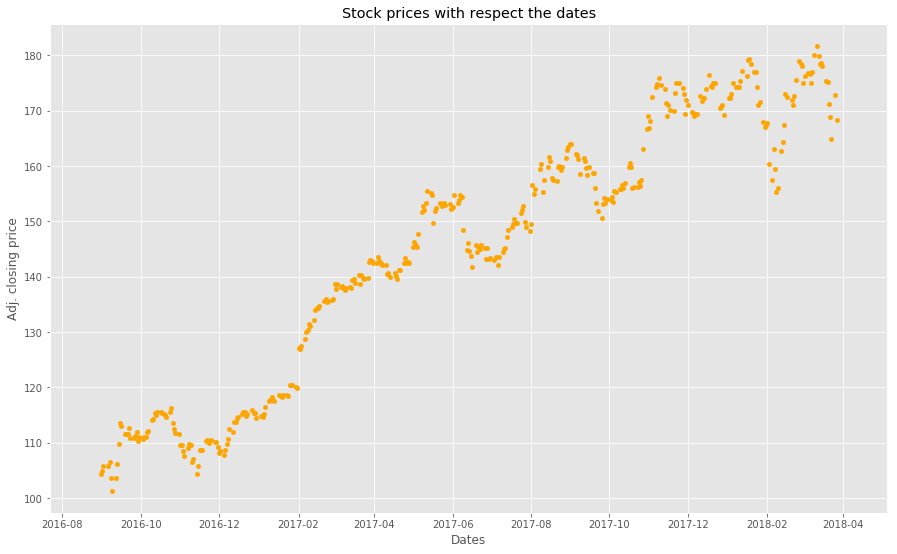

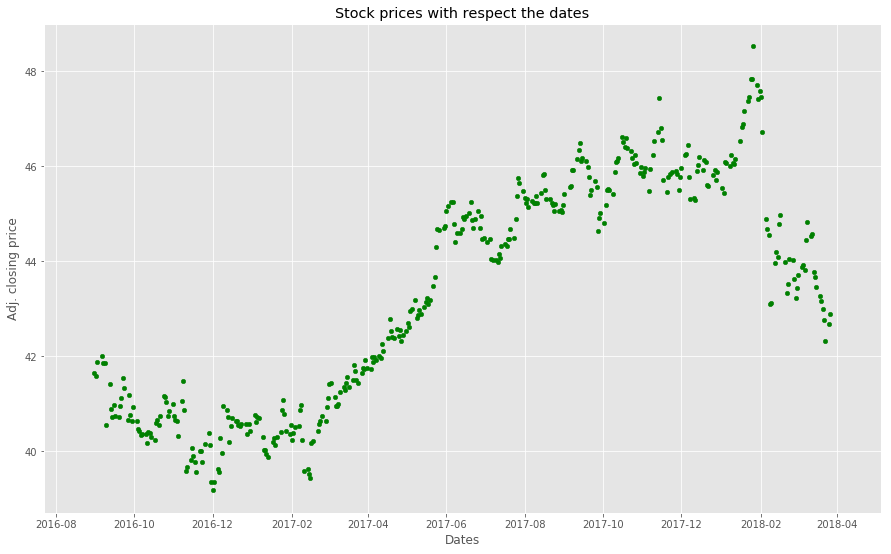

In [16]:
# Plotting stock prices
plot_stock_price(AAPL_data['Date'],AAPL_data['Adj. Close'],"Dates","Adj. closing price","orange")
plot_stock_price(KO_data['Date'],KO_data['Adj. Close'],"Dates","Adj. closing price","green")

In [17]:
# Below I create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list 
# of these objects and using the join method
stocks = pd.DataFrame({"Date": KO_data["Date"],
                      "AAPL": AAPL_data["Adj. Close"],
                      "KO": KO_data["Adj. Close"]})
stocks.set_index("Date",inplace=True)
print("Stock data for AAPL and KO Adj.Close price: ")
stocks.head()

Stock data for AAPL and KO Adj.Close price: 


,AAPL,KO
Date,,
2016-08-31,104.248477,41.658137
2016-09-01,104.867483,41.581401
2016-09-02,105.850032,41.878754
2016-09-06,105.820556,42.003450
2016-09-07,106.469039,41.859570


Text(0.5,1,'Plotting AAPL and KO data on the same scale')

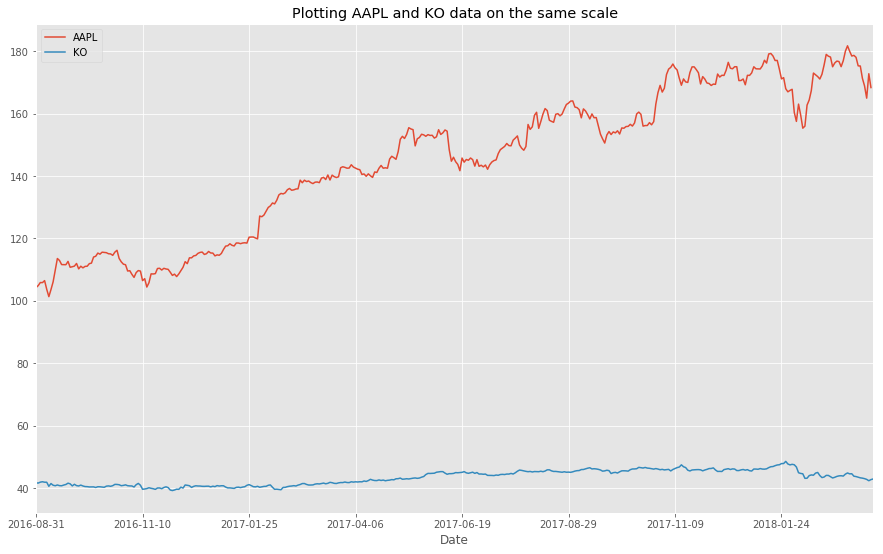

In [18]:
stocks.plot(grid=True)
plt.title("Plotting AAPL and KO data on the same scale")

While absolute price is important, when trading, we are more concerned about the relative change of an asset rather than its absolute price. AAPL’s stocks are much more expensive than KO’s , and this difference makes KO’s stocks appear much less volatile than they truly are (that is, their price appears to not deviate much).
Therefore, I decided to use two different scales when plotting the data; one scale will be used by AAPL stocks, and the other by KO.

Text(0.5,1,'Plotting AAPL and KO data on the different scales')

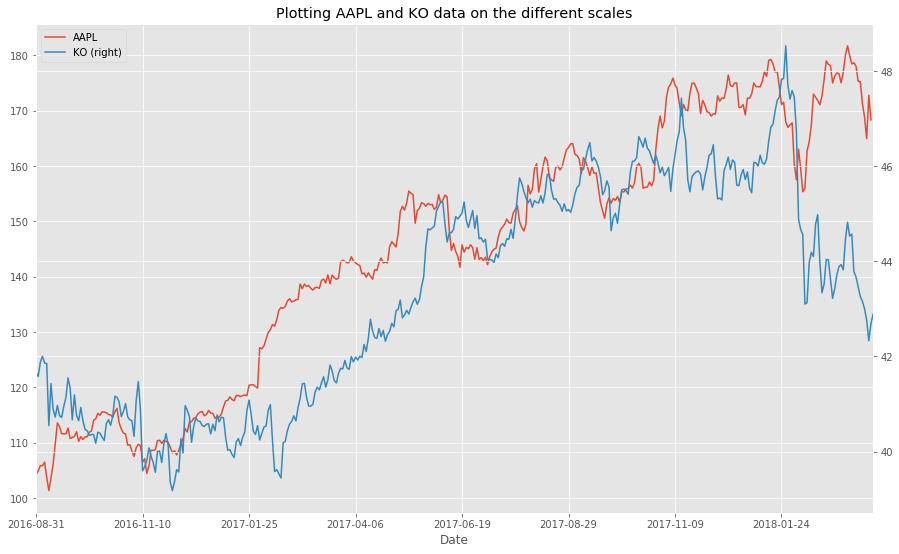

In [19]:
stocks.plot(secondary_y = ["KO"], grid = True)
plt.title("Plotting AAPL and KO data on the different scales")

The equation of trendline for AAPL data is:


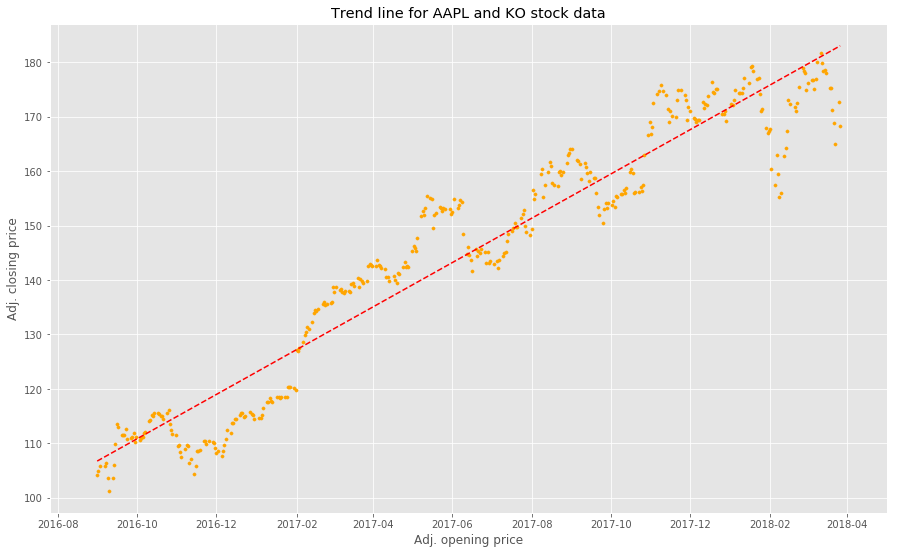

y=0.133145x+(-97915.701978)

The equation of trendline for KO data is:


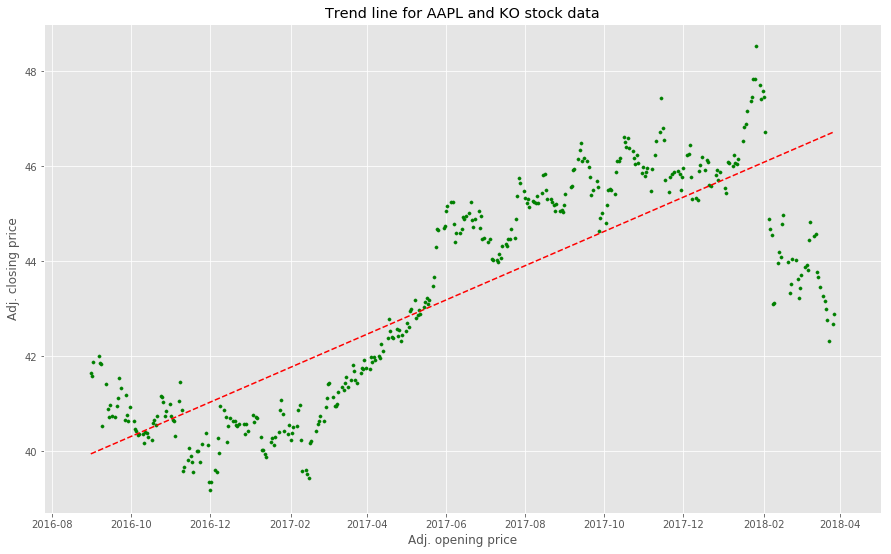

y=0.011819x+(-8661.009647)


In [20]:
# Plotting stock prices with trend lines
print("The equation of trendline for AAPL data is:")
plot_trendline_on_scatter_plot(AAPL_data['Date'],AAPL_data['Adj. Close'],"Adj. opening price","Adj. closing price","orange")
print("\nThe equation of trendline for KO data is:")
plot_trendline_on_scatter_plot(KO_data['Date'],KO_data['Adj. Close'],"Adj. opening price","Adj. closing price","green")

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

In [21]:
def correlation_matrix(df):
    """
    df : pandas dataframe(dtype : pandas.core.frame.DataFrame)
    """
    # Finding all the columns of the dataset
    features_columns_mean= list(df.columns[1:11])
    # Creating a heatmap using seaborn to find the correlation among different features
    plt.figure(figsize=(10,10))
    sns.heatmap(df[features_columns_mean].corr(), annot=True, square=True, cmap='coolwarm')
    plt.show()


Correlation of the AAPL data :


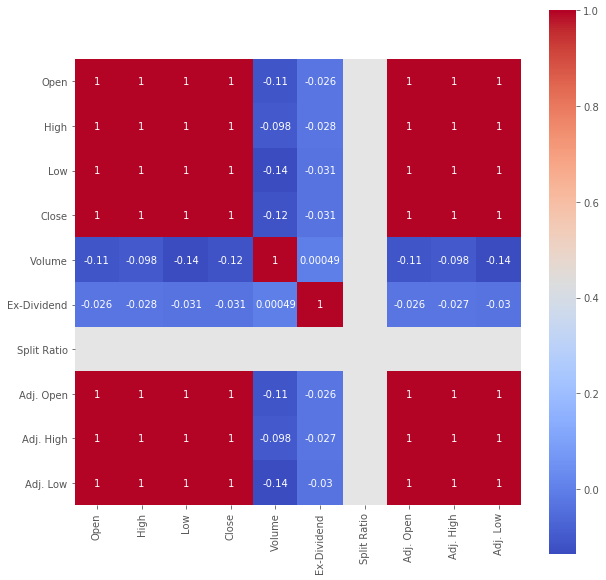

In [22]:
print("\nCorrelation of the AAPL data :")
correlation_matrix(AAPL_data)


Correlation of the KO data :


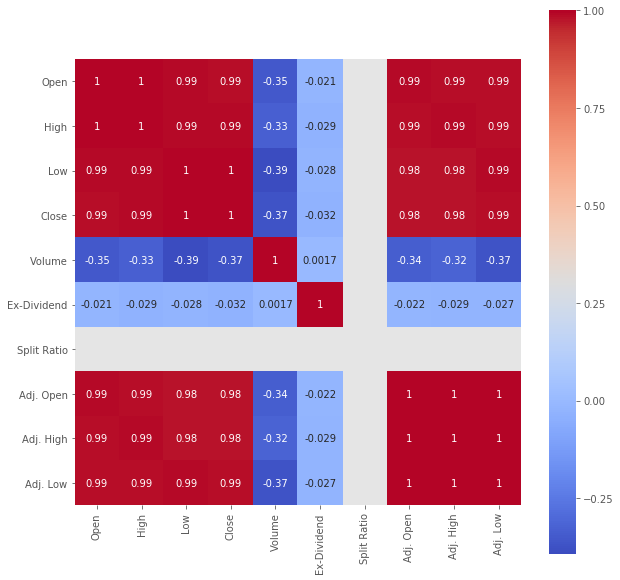

In [23]:
print("\nCorrelation of the KO data :")
correlation_matrix(KO_data)

In [24]:
def calculate_correlation_between_dataframes(df_1,df_2):
    """
    df_1 : pandas dataframe(dtype : pandas.core.frame.DataFrame)
    df_2 : pandas dataframe(dtype : pandas.core.frame.DataFrame)
    """
    print("Correlation between AAPL data and KO data: ")
    print(df_2.corrwith(df_1))
    print("\nOverall correlation between AAPL data and KO data: ")
    # Filtring individual to stay only with values int or float
    frame1 = df_1.loc[:, df_1.dtypes != np.str]
    frame2 = df_2.loc[:, df_2.dtypes != np.str]
    result = frame1.corrwith(frame2)
    print(result.sum())

In [25]:
calculate_correlation_between_dataframes(AAPL_data,KO_data)

Correlation between AAPL data and KO data: 
Open           0.792440
High           0.795798
Low            0.786041
Close          0.788433
Volume         0.221328
Ex-Dividend   -0.011493
Split Ratio         NaN
Adj. Open      0.855598
Adj. High      0.858080
Adj. Low       0.851488
Adj. Close     0.853488
Adj. Volume    0.221328
dtype: float64

Overall correlation between AAPL data and KO data: 
7.012529243211646


# Predicting Stock values on AAPL data

In [26]:
df = AAPL_data.copy()

In [27]:
# Seperating years, month, and day
df['year'] = df.Date.str.split('-').str.get(0)
df['month'] = df.Date.str.split('-').str.get(1)
df['day'] = df.Date.str.split('-').str.get(2)

In [28]:
df.drop(['Date'], axis=1,inplace=True)

In [29]:
# Getting the features and labels
# Labels are the values we want to predict
labels = np.array(df['Adj. Close'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('Adj. Close', axis = 1)

In [30]:
# Saving feature names for later use
feature_list = list(features.columns)
# Convert features to numpy array
features = np.array(features)

In [31]:
# Split the data into training and testing sets to 0.25
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (294, 14)
Training Labels Shape: (294,)
Testing Features Shape: (99, 14)
Testing Labels Shape: (99,)


In [32]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [33]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)

Determination of the Performance Metrics

In [34]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 99.77 %


Virtualizing a single decision tree

In [35]:
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree_AAPL.png')

Reducing the size of the tree annotated with labels.

In [36]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree_AAPL.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree_AAPL.dot')
graph.write_png('small_tree_AAPL.png');

In [37]:
"""Feature Relevance"""
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Close                Importance: 0.37
Variable: Adj. High            Importance: 0.12
Variable: High                 Importance: 0.11
Variable: Adj. Low             Importance: 0.11
Variable: Open                 Importance: 0.1
Variable: Low                  Importance: 0.1
Variable: Adj. Open            Importance: 0.09
Variable: Volume               Importance: 0.0
Variable: Ex-Dividend          Importance: 0.0
Variable: Split Ratio          Importance: 0.0
Variable: Adj. Volume          Importance: 0.0
Variable: year                 Importance: 0.0
Variable: month                Importance: 0.0
Variable: day                  Importance: 0.0


Visualization of Feature Importance

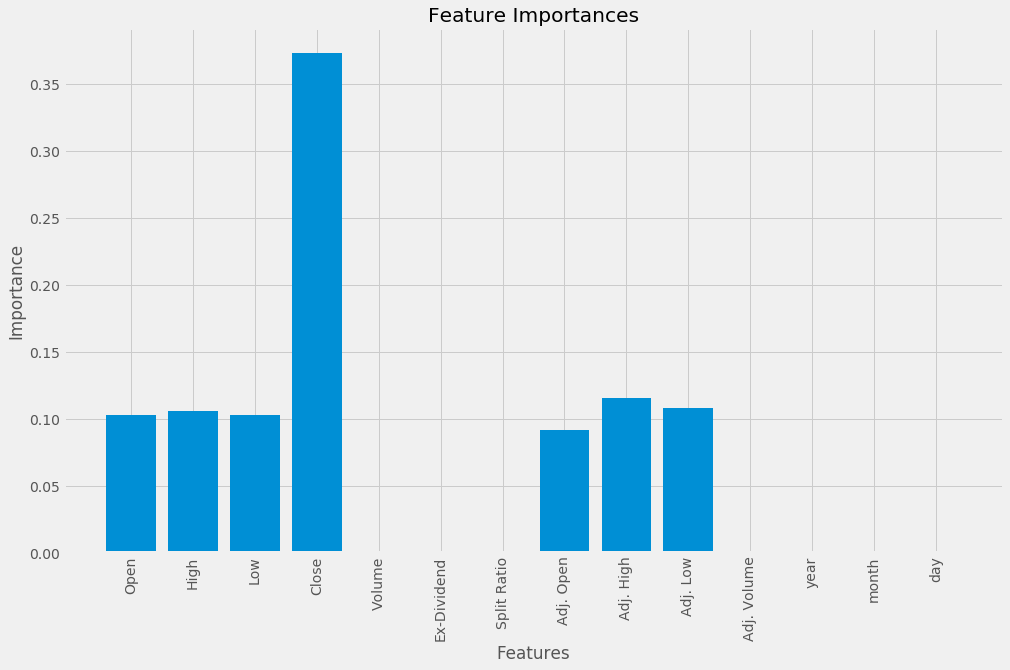

In [38]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importances');
plt.show()

Plotting the entire dataset with predictions.

In [39]:
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]       
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'Adj. Close': labels}) 

In [40]:
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

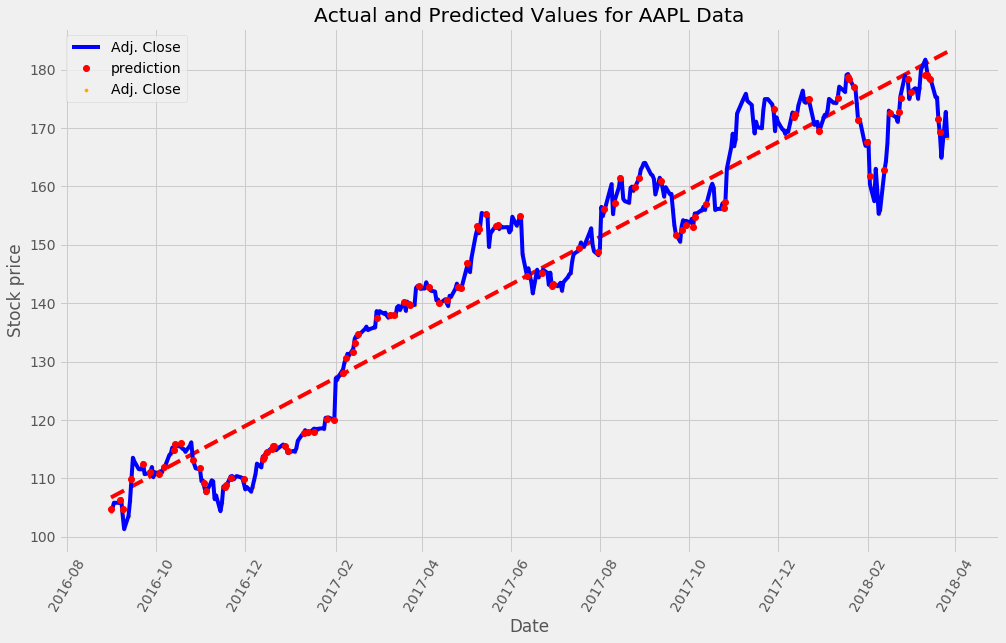

y=0.133145x+(-97915.701978)


In [41]:
plot_trendline_on_scatter_plot_with_predictions(AAPL_data['Date'],AAPL_data['Adj. Close'],"Adj. opening price","Adj. closing price","orange",predictions_data,true_data)

# Predicting Stock values on KO data

In [42]:
df = KO_data.copy()

In [43]:
# Seperating years, month, and day
df['year'] = df.Date.str.split('-').str.get(0)
df['month'] = df.Date.str.split('-').str.get(1)
df['day'] = df.Date.str.split('-').str.get(2)

In [44]:
df.drop(['Date'], axis=1,inplace=True)

In [45]:
# Getting the features and labels
# Labels are the values we want to predict
labels = np.array(df['Adj. Close'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('Adj. Close', axis = 1)

In [46]:
# Saving feature names for later use
feature_list = list(features.columns)
# Convert features to numpy array
features = np.array(features)

In [47]:
# Split the data into training and testing sets to 0.25
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (295, 14)
Training Labels Shape: (295,)
Testing Features Shape: (99, 14)
Testing Labels Shape: (99,)


In [48]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [49]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)

Determination of the performance Matrice

In [50]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 99.75 %


Virtualizing a single decision tree

In [51]:
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree_KO.png')

Reducing the size of the tree annotated with labels.

In [52]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree_KO.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree_KO.dot')
graph.write_png('small_tree_KO.png');

Visualization of Feature Importance

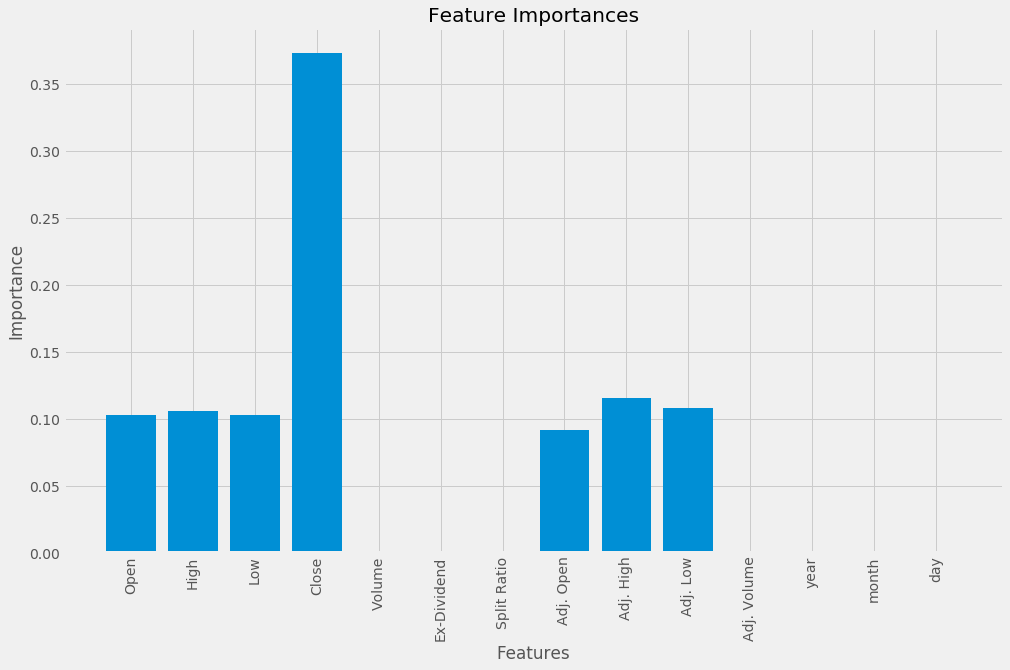

In [53]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importances');
plt.show()

In [54]:
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]       
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'Adj. Close': labels}) 

In [55]:
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

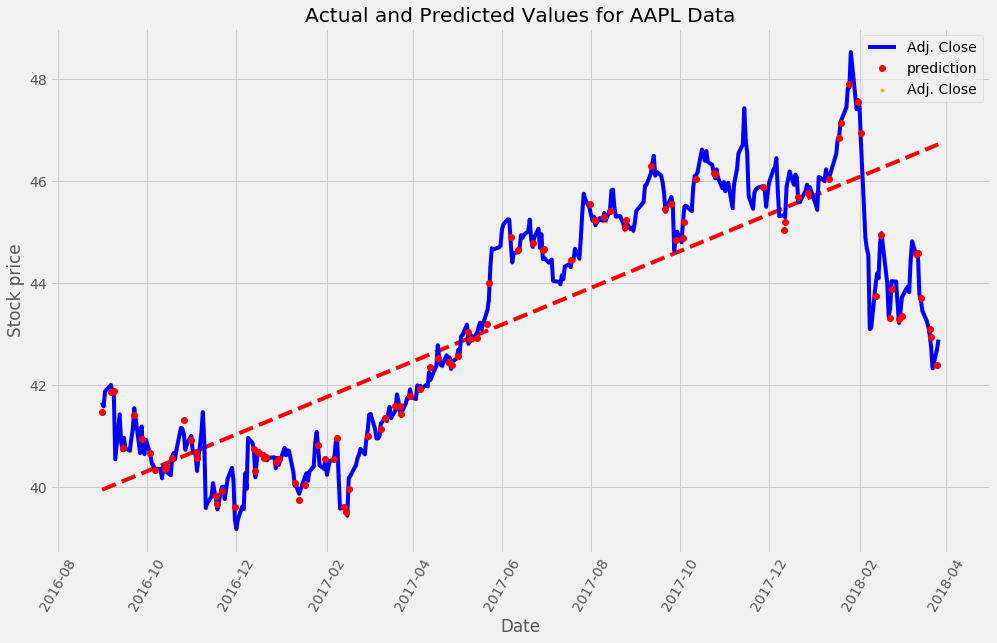

y=0.011819x+(-8661.009647)


In [56]:
plot_trendline_on_scatter_plot_with_predictions(KO_data['Date'],KO_data['Adj. Close'],"Adj. opening price","Adj. closing price","orange",predictions_data,true_data)

# Risk Metrics(Calculation of the Sharp ratio)

In [57]:
AAPL_data = pd.read_csv("AAPL.csv",parse_dates=True)
KO_data = pd.read_csv("KO.csv",parse_dates=True)

In [58]:
# Below I create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
stocks = pd.DataFrame({"AAPL": AAPL_data["Adj. Close"],
                      "KO": KO_data["Adj. Close"],
                      "Date":KO_data['Date']})
stocks.set_index(['Date'],inplace=True)
stocks.head()

,AAPL,KO
Date,,
2016-08-31,104.248477,41.658137
2016-09-01,104.867483,41.581401
2016-09-02,105.850032,41.878754
2016-09-06,105.820556,42.003450
2016-09-07,106.469039,41.859570


In [59]:
# getting stock return value = price_t/price_0
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head() - 1

,AAPL,KO
Date,,
2016-08-31,0.000000,0.000000
2016-09-01,0.005938,-0.001842
2016-09-02,0.015363,0.005296
2016-09-06,0.015080,0.008289
2016-09-07,0.021301,0.004835


Text(0.5,1,'Stock return values')

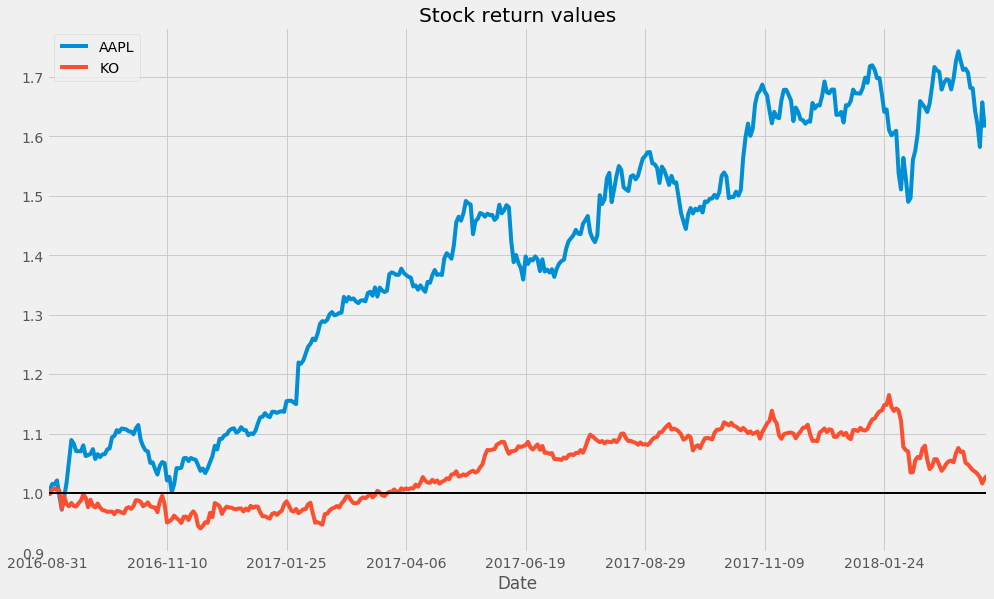

In [60]:
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
plt.title("Stock return values")

In [61]:
# Calculating change in stock_price
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,AAPL,KO
Date,,
2016-08-31,NaN,NaN
2016-09-01,0.005920,-0.001844
2016-09-02,0.009326,0.007126
2016-09-06,-0.000279,0.002973
2016-09-07,0.006109,-0.003431


Text(0.5,1,'Stock change')

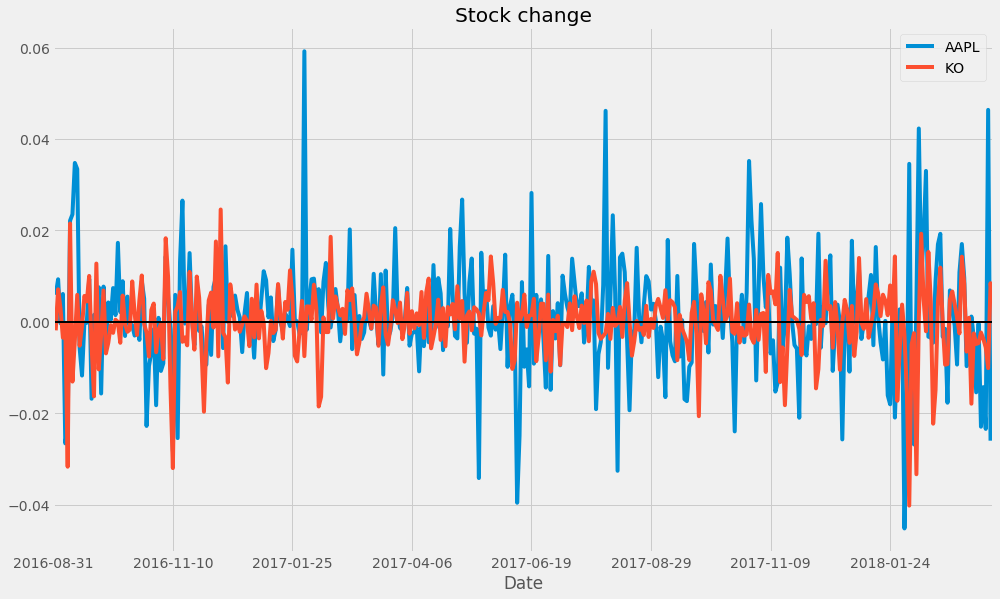

In [62]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
plt.title("Stock change")

In [63]:
# calculating annual percentage rate 
 # There are 252 trading days in a year; the 100 converts to percentages
stock_change_apr = stock_change * 252 * 100
stock_change_apr.tail()

,AAPL,KO
Date,,
2018-03-21,-359.355133,-93.593422
2018-03-22,-589.663945,-141.045144
2018-03-23,1168.762361,-254.697197
2018-03-26,-654.582257,213.409885
2018-03-27,NaN,117.784744


# Creating Portfolio for AAPL data

A q-day moving average is, for a series x_t and a point in time t, the average of the past q days: that is, if MA^q_t denotes a moving average process, then:

MA^q_t = 1/q * sum_{i = 0}^{q-1} x_{t - i}

Moving averages smooth a series and helps identify trends. The larger q is, the less responsive a moving average process is to short-term fluctuations in the series x_t. The idea is that moving average processes help identify trends from "noise". Fast moving averages have smaller q and more closely follow the stock, while slow moving averages have larger q, resulting in them responding less to the fluctuations of the stock and being more stable.

Strategy :

1) Trade the asset when the fast moving average crosses over the slow moving average.


2) Exit the trade when the fast moving average crosses over the slow moving average again.


A trade will be prompted when the fast moving average crosses from below to above the slow moving average, and the trade will be exited when the fast moving average crosses below the slow moving average later.



We now have a complete strategy. But before we decide we want to use it, we should try to evaluate the quality of the strategy first. The usual means for doing so is backtesting, which is looking at how profitable the strategy is on historical data. For example, looking at the above chart’s performance on Apple stock, if the 20-day moving average is the fast moving average and the 50-day moving average the slow, this strategy does not appear to be very profitable, at least not if you are always taking long positions.

In [64]:
df = AAPL_data

In [65]:
# Creating a 20 day moving average
df["20d"] = np.round(df["Adj. Close"].rolling(window = 20, center = False).mean(), 2)
# Creating a 50 day moving average
df["50d"] = np.round(df["Adj. Close"].rolling(window = 50, center = False).mean(), 2)

In [66]:
df['20d-50d'] = df['20d'] - df['50d']
df.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,20d,50d,20d-50d
388,2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0,176.94,172.57,4.37
389,2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0,176.76,172.46,4.30
390,2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0,176.23,172.27,3.96
391,2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0,175.92,172.22,3.70
392,2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0,175.41,172.05,3.36


We will refer to the sign of this difference as the regime; that is, if the fast moving average is above the slow moving average, this is a bullish regime (the bulls rule), and a bearish regime (the bears rule) holds when the fast moving average is below the slow moving average. I identify regimes with the following code.

In [67]:
# np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
df["Regime"] = np.where(df['20d-50d'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
df["Regime"] = np.where(df['20d-50d'] < 0, -1, df["Regime"])

In [68]:
# Taking note of all the regime's
print("No of counts in all Regime's :")
df["Regime"].value_counts()

No of counts in all Regime's :


 1    252
-1     92
 0     49
Name: Regime, dtype: int64

Trading signals appear at regime changes. When a bullish regime begins, a buy signal is triggered, and when it ends, a sell signal is triggered. Likewise, when a bearish regime begins, a sell signal is triggered, and when the regime ends, a buy signal is triggered (this is of interest only if you ever will short the stock, or use some derivative like a stock option to bet against the market).

It's simple to obtain signals. Let r_t indicate the regime at time t, and s_t the signal at time t. Then:

s_t = sign(r_t - r_{t - 1})

s_t in {-1, 0, 1}, with -1 indicating "sell", 1 indicating "buy", and 0 no action. We can obtain signals like so:

In [69]:
# To ensure that all trades close out, I temporarily change the regime of the last row to 0
regime_orig = df.loc[:, "Regime"].iloc[-1]
df.loc[:, "Regime"].iloc[-1] = 0
df["Signal"] = np.sign(df["Regime"] - df["Regime"].shift(1))
# Restore original regime data
df.loc[:, "Regime"].iloc[-1] = regime_orig
df.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,20d,50d,20d-50d,Regime,Signal
388,2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0,176.94,172.57,4.37,1,0.0
389,2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0,176.76,172.46,4.30,1,0.0
390,2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0,176.23,172.27,3.96,1,0.0
391,2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0,175.92,172.22,3.70,1,0.0
392,2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0,175.41,172.05,3.36,1,-1.0


 0.0    382
-1.0      5
 1.0      5
Name: Signal, dtype: int64


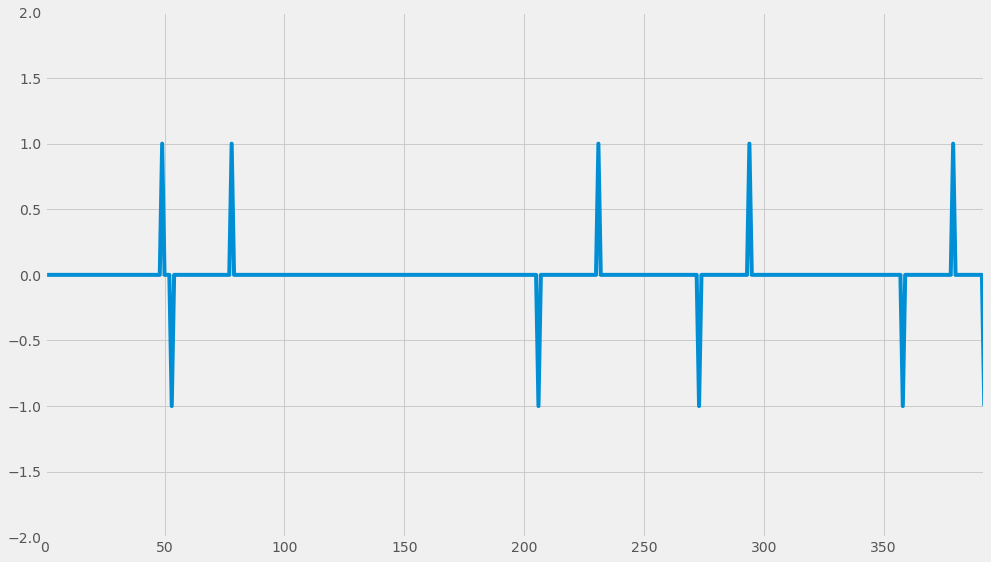

In [70]:
df["Signal"].plot(ylim = (-2, 2))
print(df["Signal"].value_counts())

This indicates that, we should buy AAPL stock 5 times and sell Apple stock 5 times. For all the remaining 382 times we should do nothing.

Let’s now try to identify what the prices of the stock is at every buy and every sell.

In [71]:
# At Buy
df.set_index(["Date"],inplace=True)
df.loc[df["Signal"] == 1, "Close"]

Date
2016-11-09    110.88
2016-12-21    117.06
2017-08-02    157.14
2017-11-01    166.89
2018-03-08    176.94
Name: Close, dtype: float64

In [72]:
# At Sell
df.loc[df["Signal"] == -1, "Close"]

Date
2016-11-15    107.11
2017-06-27    143.74
2017-10-03    154.48
2018-02-06    163.03
2018-03-27    168.34
Name: Close, dtype: float64

In [73]:
# Create a DataFrame with trades, including the price at the trade and the regime under which the trade is made.
apple_signals = pd.concat([
        pd.DataFrame({"Price": df.loc[df["Signal"] == 1, "Adj. Close"],
                     "Regime": df.loc[df["Signal"] == 1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": df.loc[df["Signal"] == -1, "Adj. Close"],
                     "Regime": df.loc[df["Signal"] == -1, "Regime"],
                     "Signal": "Sell"}),
    ])
apple_signals.sort_index(inplace = True)
print("The price at the trade :")
apple_signals

The price at the trade :


,Price,Regime,Signal
Date,,,
2016-11-09,109.510470,1,Buy
2016-11-15,105.787035,-1,Sell
2016-12-21,115.614138,1,Buy
2017-06-27,143.159139,-1,Sell
2017-08-02,156.504989,1,Buy
2017-10-03,154.480000,-1,Sell
2017-11-01,166.890000,1,Buy
2018-02-06,163.030000,-1,Sell
2018-03-08,176.940000,1,Buy


In [74]:
# Let's see the profitability of long trades
apple_long_profits = pd.DataFrame({
        "Price": apple_signals.loc[(apple_signals["Signal"] == "Buy") &
                                  apple_signals["Regime"] == 1, "Price"],
        "Profit": pd.Series(apple_signals["Price"] - apple_signals["Price"].shift(1)).loc[
            apple_signals.loc[(apple_signals["Signal"].shift(1) == "Buy") & (apple_signals["Regime"].shift(1) == 1)].index
        ].tolist(),
        "End Date": apple_signals["Price"].loc[
            apple_signals.loc[(apple_signals["Signal"].shift(1) == "Buy") & (apple_signals["Regime"].shift(1) == 1)].index
        ].index
    })
print("The Profits at long trades :")
apple_long_profits

The Profits at long trades :


,End Date,Price,Profit
Date,,,
2016-11-09,2016-11-15,109.510470,-3.723435
2016-12-21,2017-06-27,115.614138,27.545001
2017-08-02,2017-10-03,156.504989,-2.024989
2017-11-01,2018-02-06,166.890000,-3.860000
2018-03-08,2018-03-27,176.940000,-8.600000


Let’s now create a simulated portfolio of 10,00,000 EUR and see how it would behave, according to the rules we have established. This includes:

1) Investing only 10% of the portfolio in any trade

2) Exiting the position if losses exceed 20% of the value of the trade.



When simulating, bear in mind that:

1) Trades are done in batches of 100 stocks.

2) Our stop-loss rule involves placing an order to sell the stock the moment the price drops below the specified level. Thus we need to check whether the lows during this period ever go low enough to trigger the stop-loss. Realistically, unless we buy a put option, we cannot guarantee that we will sell the stock at the price we set at the stop-loss, but we will use this as the selling price anyway for the sake of simplicity.

3) Every trade is accompanied by a commission to the broker, which should be accounted for. I do not do so here.

In [75]:
# Backtesting
# We need to get the low of the price during each trade.
tradeperiods = pd.DataFrame({"Start": apple_long_profits.index,
                            "End": apple_long_profits["End Date"]})
apple_long_profits["Low"] = tradeperiods.apply(lambda x: min(df.loc[x["Start"]:x["End"], "Adj. Low"]), axis = 1)
apple_long_profits

,End Date,Price,Profit,Low
Date,,,,
2016-11-09,2016-11-15,109.510470,-3.723435,102.794460
2016-12-21,2017-06-27,115.614138,27.545001,113.342546
2017-08-02,2017-10-03,156.504989,-2.024989,149.160000
2017-11-01,2018-02-06,166.890000,-3.860000,154.000000
2018-03-08,2018-03-27,176.940000,-8.600000,164.940000


In [76]:
# Now we have all the information needed to simulate this strategy in apple_adj_long_profits
cash = 1000000
apple_backtest = pd.DataFrame({"Start Port. Value": [],
                         "End Port. Value": [],
                         "End Date": [],
                         "Shares": [],
                         "Share Price": [],
                         "Trade Value": [],
                         "Profit per Share": [],
                         "Total Profit": [],
                         "Stop-Loss Triggered": []})
port_value = .1  # Max proportion of portfolio bet on any trade
batch = 100      # Number of shares bought per batch
stoploss = .2    # % of trade loss that would trigger a stoploss
for index, row in apple_long_profits.iterrows():
    batches = np.floor(cash * port_value) // np.ceil(batch * row["Price"]) # Maximum number of batches of stocks invested in
    trade_val = batches * batch * row["Price"] # How much money is put on the line with each trade
    if row["Low"] < (1 - stoploss) * row["Price"]:   # Account for the stop-loss
        share_profit = np.round((1 - stoploss) * row["Price"], 2)
        stop_trig = True
    else:
        share_profit = row["Profit"]
        stop_trig = False
    profit = share_profit * batches * batch # Compute profits
    # Add a row to the backtest data frame containing the results of the trade
    apple_backtest = apple_backtest.append(pd.DataFrame({
                "Start Port. Value": cash,
                "End Port. Value": cash + profit,
                "End Date": row["End Date"],
                "Shares": batch * batches,
                "Share Price": row["Price"],
                "Trade Value": trade_val,
                "Profit per Share": share_profit,
                "Total Profit": profit,
                "Stop-Loss Triggered": stop_trig
            }, index = [index]))
    cash = max(0, cash + profit)

apple_backtest

,End Date,End Port. Value,Profit per Share,Share Price,Shares,Start Port. Value,Stop-Loss Triggered,Total Profit,Trade Value
2016-11-09,2016-11-15,9.966489e+05,-3.723435,109.510470,900.0,1.000000e+06,0.0,-3351.091493,98559.423001
2016-12-21,2017-06-27,1.018685e+06,27.545001,115.614138,800.0,9.966489e+05,0.0,22036.000976,92491.310378
2017-08-02,2017-10-03,1.017470e+06,-2.024989,156.504989,600.0,1.018685e+06,0.0,-1214.993457,93902.993457
2017-11-01,2018-02-06,1.015154e+06,-3.860000,166.890000,600.0,1.017470e+06,0.0,-2316.000000,100134.000000
2018-03-08,2018-03-27,1.010854e+06,-8.600000,176.940000,500.0,1.015154e+06,0.0,-4300.000000,88470.000000


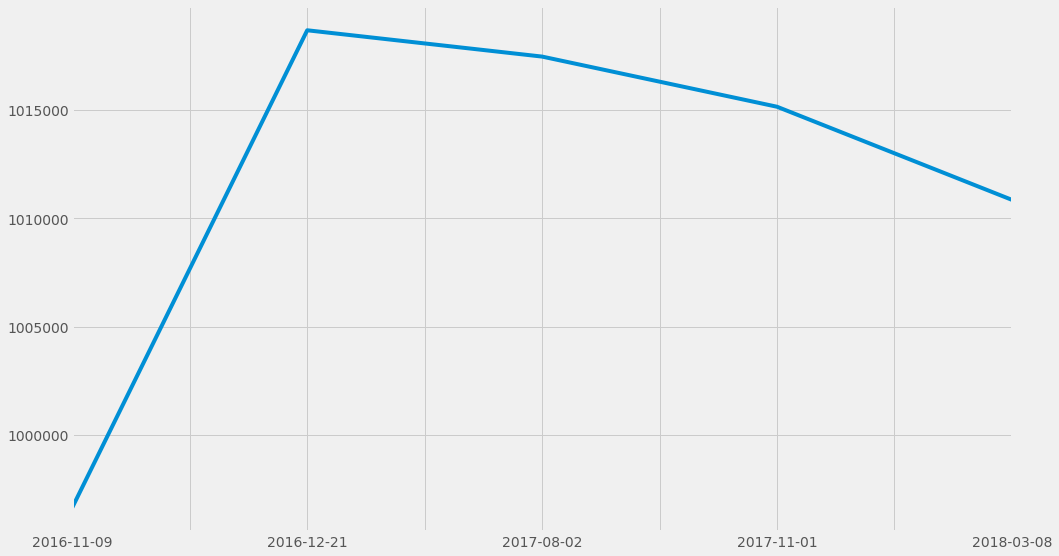

In [78]:
apple_backtest["End Port. Value"].plot()

This indicates that our portfolio's value grew up by about 1 % in 4 months.

# Creating Portfolio for KO data

In [79]:
df = KO_data

In [80]:
# Creating a 20 day moving average
df["20d"] = np.round(df["Adj. Close"].rolling(window = 20, center = False).mean(), 2)
# Creating a 50 day moving average
df["50d"] = np.round(df["Adj. Close"].rolling(window = 50, center = False).mean(), 2)

In [81]:
df['20d-50d'] = df['20d'] - df['50d']
df.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,20d,50d,20d-50d
389,2018-03-21,43.13,43.4500,42.790,43.00,13029766.0,0.0,1.0,43.13,43.4500,42.790,43.00,13029766.0,43.80,45.07,-1.27
390,2018-03-22,42.88,43.3650,42.700,42.76,12134714.0,0.0,1.0,42.88,43.3650,42.700,42.76,12134714.0,43.76,45.00,-1.24
391,2018-03-23,42.82,43.1556,42.290,42.33,13190877.0,0.0,1.0,42.82,43.1556,42.290,42.33,13190877.0,43.67,44.92,-1.25
392,2018-03-26,42.61,42.8099,42.250,42.69,10939927.0,0.0,1.0,42.61,42.8099,42.250,42.69,10939927.0,43.61,44.86,-1.25
393,2018-03-27,42.70,43.3100,42.525,42.89,11595357.0,0.0,1.0,42.70,43.3100,42.525,42.89,11595357.0,43.57,44.79,-1.22


In [82]:
# np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
df["Regime"] = np.where(df['20d-50d'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
df["Regime"] = np.where(df['20d-50d'] < 0, -1, df["Regime"])

In [83]:
# Taking note of all the regime's
print("No of counts in all Regime's :")
df["Regime"].value_counts()

No of counts in all Regime's :


 1    239
-1    105
 0     50
Name: Regime, dtype: int64

In [84]:
# To ensure that all trades close out, I temporarily change the regime of the last row to 0
regime_orig = df.loc[:, "Regime"].iloc[-1]
df.loc[:, "Regime"].iloc[-1] = 0
df["Signal"] = np.sign(df["Regime"] - df["Regime"].shift(1))
# Restore original regime data
df.loc[:, "Regime"].iloc[-1] = regime_orig
df.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,20d,50d,20d-50d,Regime,Signal
389,2018-03-21,43.13,43.4500,42.790,43.00,13029766.0,0.0,1.0,43.13,43.4500,42.790,43.00,13029766.0,43.80,45.07,-1.27,-1,0.0
390,2018-03-22,42.88,43.3650,42.700,42.76,12134714.0,0.0,1.0,42.88,43.3650,42.700,42.76,12134714.0,43.76,45.00,-1.24,-1,0.0
391,2018-03-23,42.82,43.1556,42.290,42.33,13190877.0,0.0,1.0,42.82,43.1556,42.290,42.33,13190877.0,43.67,44.92,-1.25,-1,0.0
392,2018-03-26,42.61,42.8099,42.250,42.69,10939927.0,0.0,1.0,42.61,42.8099,42.250,42.69,10939927.0,43.61,44.86,-1.25,-1,0.0
393,2018-03-27,42.70,43.3100,42.525,42.89,11595357.0,0.0,1.0,42.70,43.3100,42.525,42.89,11595357.0,43.57,44.79,-1.22,-1,1.0


 0.0    382
-1.0      6
 1.0      5
Name: Signal, dtype: int64


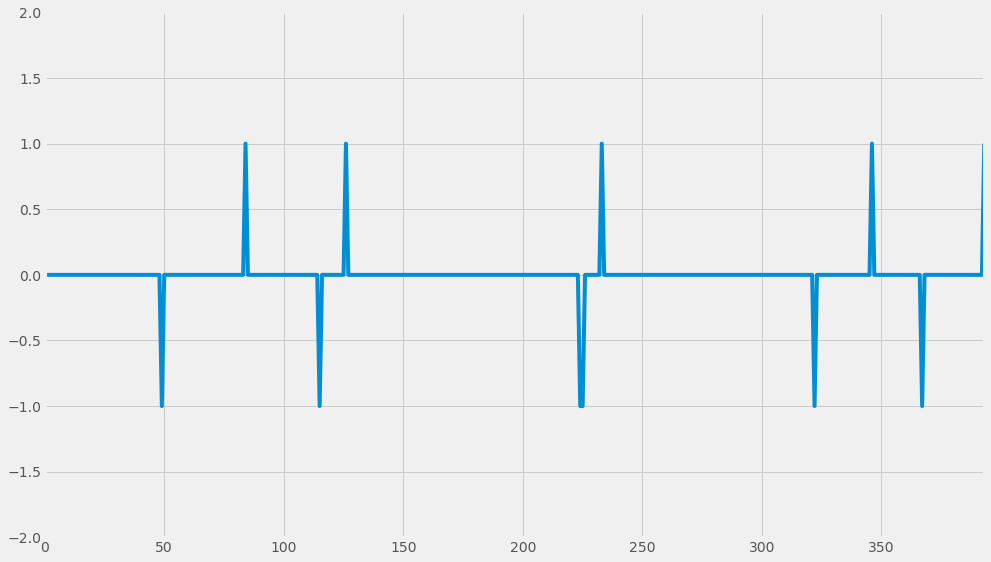

In [85]:
df["Signal"].plot(ylim = (-2, 2))
print(df["Signal"].value_counts())

In [86]:
# At Buy
df.set_index(["Date"],inplace=True)
df.loc[df["Signal"] == 1, "Close"]

Date
2016-12-30    41.46
2017-03-03    42.48
2017-08-04    45.50
2018-01-18    46.88
2018-03-27    42.89
Name: Close, dtype: float64

In [87]:
# At Sell
df.loc[df["Signal"] == -1, "Close"]

Date
2016-11-09    42.27
2017-02-15    40.44
2017-07-24    44.84
2017-07-25    45.24
2017-12-12    45.29
2018-02-16    44.98
Name: Close, dtype: float64

In [88]:
# Create a DataFrame with trades, including the price at the trade and the regime under which the trade is made.
ko_signals = pd.concat([
        pd.DataFrame({"Price": df.loc[df["Signal"] == 1, "Adj. Close"],
                     "Regime": df.loc[df["Signal"] == 1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": df.loc[df["Signal"] == -1, "Adj. Close"],
                     "Regime": df.loc[df["Signal"] == -1, "Regime"],
                     "Signal": "Sell"}),
    ])
ko_signals.sort_index(inplace = True)
print("The price at the trade :")
ko_signals

The price at the trade :


,Price,Regime,Signal
Date,,,
2016-11-09,40.881105,-1,Sell
2016-12-30,40.438769,1,Buy
2017-02-15,39.443893,-1,Sell
2017-03-03,41.433645,1,Buy
2017-07-24,44.483055,0,Sell
2017-07-25,44.879871,-1,Sell
2017-08-04,45.137801,1,Buy
2017-12-12,45.290000,-1,Sell
2018-01-18,46.880000,1,Buy


# Creating the Portofolio of AAPL and KO data together

A more realistic portfolio would not be betting 10% of its value on only one stock. A more realistic one would consider investing in multiple stocks. Multiple trades may be ongoing at any given time involving multiple companies, and most of the portfolio will be in stocks, not cash. Now that we will be investing in multiple stops and exiting only when moving averages cross (not because of a stop-loss), we will need to change our approach to backtesting.

In [89]:
AAPL_data = pd.read_csv("AAPL.csv",parse_dates=True)
KO_data = pd.read_csv("KO.csv",parse_dates=True)

In [90]:
AAPL_data.set_index(['Date'],inplace=True)
KO_data.set_index(['Date'],inplace=True)

In [91]:
def ma_crossover_orders(stocks, fast, slow):
    """
    :param stocks: A list of tuples, the first argument in each tuple being a string containing the ticker symbol of each stock (or however you want the stock represented, so long as it's unique), and the second being a pandas DataFrame containing the stocks, with a "Close" column and indexing by date (like the data frames returned by the Yahoo! Finance API)
    :param fast: Integer for the number of days used in the fast moving average
    :param slow: Integer for the number of days used in the slow moving average
 
    :return: pandas DataFrame containing stock orders
 
    This function takes a list of stocks and determines when each stock would be bought or sold depending on a moving average crossover strategy, returning a data frame with information about when the stocks in the portfolio are bought or sold according to the strategy
    """
    fast_str = str(fast) + 'd'
    slow_str = str(slow) + 'd'
    ma_diff_str = fast_str + '-' + slow_str
 
    trades = pd.DataFrame({"Price": [], "Regime": [], "Signal": []})
    for s in stocks:
        # Get the moving averages, both fast and slow, along with the difference in the moving averages
        s[1][fast_str] = np.round(s[1]["Close"].rolling(window = fast, center = False).mean(), 2)
        s[1][slow_str] = np.round(s[1]["Close"].rolling(window = slow, center = False).mean(), 2)
        s[1][ma_diff_str] = s[1][fast_str] - s[1][slow_str]
 
        # np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
        s[1]["Regime"] = np.where(s[1][ma_diff_str] > 0, 1, 0)
        # We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
        s[1]["Regime"] = np.where(s[1][ma_diff_str] < 0, -1, s[1]["Regime"])
        # To ensure that all trades close out, I temporarily change the regime of the last row to 0
        regime_orig = s[1].loc[:, "Regime"].iloc[-1]
        s[1].loc[:, "Regime"].iloc[-1] = 0
        s[1]["Signal"] = np.sign(s[1]["Regime"] - s[1]["Regime"].shift(1))
        # Restore original regime data
        s[1].loc[:, "Regime"].iloc[-1] = regime_orig
 
        # Get signals
        signals = pd.concat([
            pd.DataFrame({"Price": s[1].loc[s[1]["Signal"] == 1, "Adj. Close"],
                         "Regime": s[1].loc[s[1]["Signal"] == 1, "Regime"],
                         "Signal": "Buy"}),
            pd.DataFrame({"Price": s[1].loc[s[1]["Signal"] == -1, "Adj. Close"],
                         "Regime": s[1].loc[s[1]["Signal"] == -1, "Regime"],
                         "Signal": "Sell"}),
        ])
        signals.index = pd.MultiIndex.from_product([signals.index, [s[0]]], names = ["Date", "Symbol"])
        trades = trades.append(signals)
        
    trades.sort_index(inplace = True)
    trades.index = pd.MultiIndex.from_tuples(trades.index, names = ["Date", "Symbol"])
    
    return trades
 

def backtest(signals, cash, port_value = .1, batch = 100):
    """
    signals: pandas DataFrame containing buy and sell signals with stock prices and symbols, like that returned by ma_crossover_orders
    cash: integer for starting cash value
    port_value: maximum proportion of portfolio to risk on any single trade
    batch: Trading batch sizes
 
    :return: pandas DataFrame with backtesting results
 
    This function backtests strategies, with the signals generated by the strategies being passed in the signals DataFrame. A fictitious portfolio is simulated and the returns generated by this portfolio are reported.
    """
 
    SYMBOL = 1 # Constant for which element in index represents symbol
    portfolio = dict()    # Will contain how many stocks are in the portfolio for a given symbol
    port_prices = dict()  # Tracks old trade prices for determining profits
    # Dataframe that will contain backtesting report
    results = pd.DataFrame({"Start Cash": [],
                            "End Cash": [],
                            "Portfolio Value": [],
                            "Type": [],
                            "Shares": [],
                            "Share Price": [],
                            "Trade Value": [],
                            "Profit per Share": [],
                            "Total Profit": []})
 
    for index, row in signals.iterrows():
        # These first few lines are done for any trade
        shares = portfolio.setdefault(index[SYMBOL], 0)
        trade_val = 0
        batches = 0
        cash_change = row["Price"] * shares   # Shares could potentially be a positive or negative number (cash_change will be added in the end; negative shares indicate a short)
        portfolio[index[SYMBOL]] = 0  # For a given symbol, a position is effectively cleared
 
        old_price = port_prices.setdefault(index[SYMBOL], row["Price"])
        portfolio_val = 0
        for key, val in portfolio.items():
            portfolio_val += val * port_prices[key]
 
        if row["Signal"] == "Buy" and row["Regime"] == 1:  # Entering a long position
            batches = np.floor((portfolio_val + cash) * port_value) // np.ceil(batch * row["Price"]) # Maximum number of batches of stocks invested in
            trade_val = batches * batch * row["Price"] # How much money is put on the line with each trade
            cash_change -= trade_val  # We are buying shares so cash will go down
            portfolio[index[SYMBOL]] = batches * batch  # Recording how many shares are currently invested in the stock
            port_prices[index[SYMBOL]] = row["Price"]   # Record price
            old_price = row["Price"]
        elif row["Signal"] == "Sell" and row["Regime"] == -1: # Entering a short
            pass
            # Do nothing; can we provide a method for shorting the market?
        #else:
            #raise ValueError("I don't know what to do with signal " + row["Signal"])
 
        pprofit = row["Price"] - old_price   # Compute profit per share; old_price is set in such a way that entering a position results in a profit of zero
 
        # Update report
        results = results.append(pd.DataFrame({
                "Start Cash": cash,
                "End Cash": cash + cash_change,
                "Portfolio Value": cash + cash_change + portfolio_val + trade_val,
                "Type": row["Signal"],
                "Shares": batch * batches,
                "Share Price": row["Price"],
                "Trade Value": abs(cash_change),
                "Profit per Share": pprofit,
                "Total Profit": batches * batch * pprofit
            }, index = [index]))
        cash += cash_change  # Final change to cash balance
 
    results.sort_index(inplace = True)
    results.index = pd.MultiIndex.from_tuples(results.index, names = ["Date", "Symbol"])
 
    return results

In [92]:
signals = ma_crossover_orders([("APPLE",AAPL_data),("KO",KO_data)],fast=20,slow=50)
signals

Price  Regime Signal
Date       Symbol                           
2016-11-09 APPLE   109.510470     1.0    Buy
           KO       40.881105    -1.0   Sell
2016-11-15 APPLE   105.787035    -1.0   Sell
2016-12-22 APPLE   114.853649     1.0    Buy
2017-01-05 KO       40.721626     1.0    Buy
2017-02-15 KO       39.443893    -1.0   Sell
2017-03-03 KO       41.433645     1.0    Buy
2017-06-27 APPLE   143.159139    -1.0   Sell
2017-07-19 KO       44.473135    -1.0   Sell
2017-08-02 APPLE   156.504989     1.0    Buy
2017-08-08 KO       45.237005     1.0    Buy
2017-10-02 APPLE   153.810000    -1.0   Sell
2017-10-05 KO       45.520000    -1.0   Sell
2017-10-25 KO       46.055000     1.0    Buy
2017-11-01 APPLE   166.890000     1.0    Buy
2017-12-12 KO       45.290000    -1.0   Sell
2018-01-18 KO       46.880000     1.0    Buy
2018-02-06 APPLE   163.030000    -1.0   Sell
2018-02-16 KO       44.980000    -1.0   Sell
2018-03-08 APPLE   176.940000     1.0    Buy
2018-03-27 APPLE   168.340000     1.0   Sell
           KO       42.890000    -1.0    Buy

In [93]:
bk = backtest(signals, 1000000)
bk

End Cash  Portfolio Value  Profit per Share  \
Date       Symbol                                                    
2016-11-09 APPLE   9.014406e+05     1.000000e+06          0.000000   
           KO      9.014406e+05     1.000000e+06          0.000000   
2016-11-15 APPLE   9.966489e+05     9.966489e+05         -3.723435   
2016-12-22 APPLE   9.047660e+05     9.966489e+05          0.000000   
2017-01-05 KO      8.070341e+05     9.966489e+05          0.000000   
2017-02-15 KO      9.016994e+05     9.935824e+05         -1.277732   
2017-03-03 KO      8.064020e+05     9.935824e+05          0.000000   
2017-06-27 APPLE   9.209294e+05     1.016227e+06         28.305491   
2017-07-19 KO      1.023218e+06     1.023218e+06          3.039490   
2017-08-02 APPLE   9.293146e+05     1.023218e+06          0.000000   
2017-08-08 KO      8.297932e+05     1.023218e+06          0.000000   
2017-10-02 APPLE   9.220792e+05     1.021601e+06         -2.694989   
2017-10-05 KO      1.022223e+06     1.022223e+06          0.282995   
2017-10-25 KO      9.209022e+05     1.022223e+06          0.000000   
2017-11-01 APPLE   8.207682e+05     1.022223e+06          0.000000   
2017-12-12 KO      9.204062e+05     1.020540e+06         -0.765000   
2018-01-18 KO      8.219582e+05     1.020540e+06          0.000000   
2018-02-06 APPLE   9.197762e+05     1.018224e+06         -3.860000   
2018-02-16 KO      1.014234e+06     1.014234e+06         -1.900000   
2018-03-08 APPLE   9.257642e+05     1.014234e+06          0.000000   
2018-03-27 APPLE   1.009934e+06     1.009934e+06         -8.600000   
           KO      1.009934e+06     1.009934e+06         -3.990000   

                   Share Price  Shares    Start Cash  Total Profit  \
Date       Symbol                                                    
2016-11-09 APPLE    109.510470   900.0  1.000000e+06           0.0   
           KO        40.881105     0.0  9.014406e+05           0.0   
2016-11-15 APPLE    105.787035     0.0  9.014406e+05          -0.0   
2016-12-22 APPLE    114.853649   800.0  9.966489e+05           0.0   
2017-01-05 KO        40.721626  2400.0  9.047660e+05           0.0   
2017-02-15 KO        39.443893     0.0  8.070341e+05          -0.0   
2017-03-03 KO        41.433645  2300.0  9.016994e+05           0.0   
2017-06-27 APPLE    143.159139     0.0  8.064020e+05           0.0   
2017-07-19 KO        44.473135     0.0  9.209294e+05           0.0   
2017-08-02 APPLE    156.504989   600.0  1.023218e+06           0.0   
2017-08-08 KO        45.237005  2200.0  9.293146e+05           0.0   
2017-10-02 APPLE    153.810000     0.0  8.297932e+05          -0.0   
2017-10-05 KO        45.520000     0.0  9.220792e+05           0.0   
2017-10-25 KO        46.055000  2200.0  1.022223e+06           0.0   
2017-11-01 APPLE    166.890000   600.0  9.209022e+05           0.0   
2017-12-12 KO        45.290000     0.0  8.207682e+05          -0.0   
2018-01-18 KO        46.880000  2100.0  9.204062e+05           0.0   
2018-02-06 APPLE    163.030000     0.0  8.219582e+05          -0.0   
2018-02-16 KO        44.980000     0.0  9.197762e+05          -0.0   
2018-03-08 APPLE    176.940000   500.0  1.014234e+06           0.0   
2018-03-27 APPLE    168.340000     0.0  9.257642e+05          -0.0   
           KO        42.890000     0.0  1.009934e+06          -0.0   

                     Trade Value  Type  
Date       Symbol                       
2016-11-09 APPLE    98559.423001   Buy  
           KO           0.000000  Sell  
2016-11-15 APPLE    95208.331508  Sell  
2016-12-22 APPLE    91882.918878   Buy  
2017-01-05 KO       97731.902237   Buy  
2017-02-15 KO       94665.344347  Sell  
2017-03-03 KO       95297.382996   Buy  
2017-06-27 APPLE   114527.311353  Sell  
2017-07-19 KO      102288.209768  Sell  
2017-08-02 APPLE    93902.993457   Buy  
2017-08-08 KO       99521.411360   Buy  
2017-10-02 APPLE    92286.000000  Sell  
2017-10-05 KO      100144.000000  Sell  
2017-10-25 KO      101321.000000   Buy  
2017-

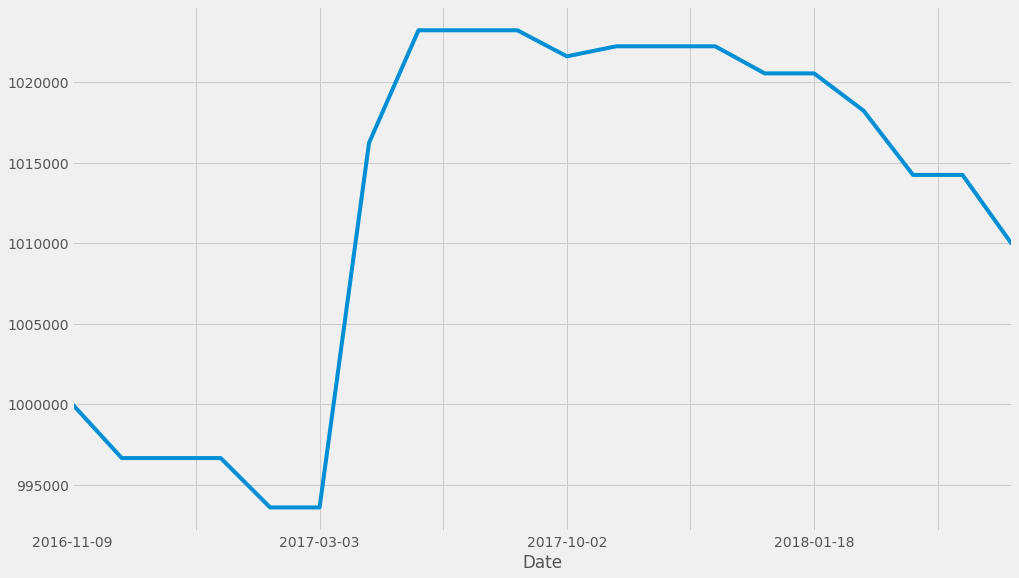

In [94]:
bk["Portfolio Value"].groupby(level = 0).apply(lambda x: x[-1]).plot()